In [12]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A5/cs3220_A5_tasks/src' #@param {type: "string"}
sys.path.append(path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1.

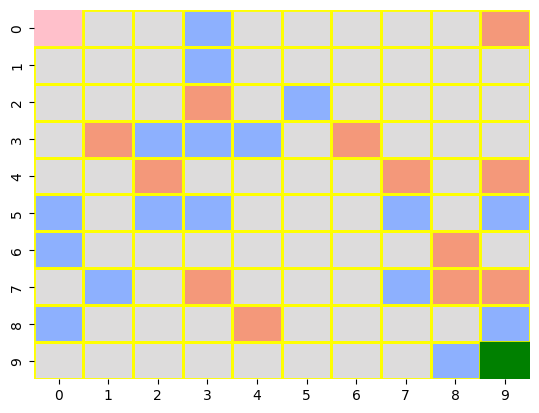

In [13]:
from mazeData import makeMaze
n=10
a=makeMaze(n)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i==0 and j==0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i==maze.shape[0]-1 and j==maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()


draw_maze(a)



In [25]:
from mazeData import defineMazeAvailableActions
from mazeData import makeMazeTransformationModel
from mazeGraphClass import mazeGraph
from mazeProblemClass import MazeProblem
from mazeData import getFoodLocation
from nodeClass import Node
import math
from agentsPrograms import A_StarSearchAgentProgram
from agents import ProblemSolvingMazeAgentAStar

mazeAvailableActs=defineMazeAvailableActions(a)
maze=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph=mazeGraph(maze)
initState, goalState=(0,0),getFoodLocation(a)
mp1=MazeProblem(initState,goalState,mazeWorldGraph)
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2))
f1=A_StarSearchAgentProgram(math.dist)
f1(mp1)


9.0
problem: <mazeProblemClass.MazeProblem object at 0x0000017C999BDF40>
[(9.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(10.0, <Node (0, 1)>), (10.055, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(10.055, <Node (1, 0)>), (11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 3
[(11.0, <Node (0, 2)>), (11.062, <Node (1, 1)>), (11.22, <Node (2, 0)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (1, 2)>.
Child node path cost: 5
Nodes expanded: 4
[(11.062, <Node (1, 1)>), (11.22, <Node (2, 0)>), (12.071, <Node (1, 2)>)]
The node (1, 1) is extracted from frontier:
The child node <N

<Node (0, 9)>

In [20]:
AStar_MazeAgent1=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalState)
AStar_MazeAgent1.goal

(np.int64(0), np.int64(9))

In [21]:
print()
print(AStar_MazeAgent1((0,2)))


[(7.0, <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 2)>.
Child node path cost: 1
Nodes expanded: 1
[(8.071, <Node (1, 2)>), (10.0, <Node (0, 1)>)]
The node (1, 2) is extracted from frontier:
The child node <Node (1, 1)>.
Child node path cost: 3
The child node <Node (2, 2)>.
Child node path cost: 2
Nodes expanded: 2
[(9.280000000000001, <Node (2, 2)>), (11.062, <Node (1, 1)>), (10.0, <Node (0, 1)>)]
The node (2, 2) is extracted from frontier:
The child node <Node (2, 1)>.
Child node path cost: 4
The child node <Node (2, 3)>.
Child node path cost: 4
Nodes expanded: 3
[(10.0, <Node (0, 1)>), (10.325, <Node (2, 3)>), (12.246, <Node (2, 1)>), (11.062, <Node (1, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
Child node path cost: 4
Nodes expanded: 4
[(10.325, <Node (2, 3)>), (11.062, <Node (1, 1)>), (12.246, <Node (2, 1)>), (13.0, <Node (0, 0)>)]
The node (2, 3) is 

In [18]:
goalStates=[goalState, (n-1,n-1)]
initState

(0, 0)

In [19]:
AStar_MazeAgent2=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
AStar_MazeAgent2.goal

[(np.int64(0), np.int64(9)), (9, 9)]

In [ ]:
print("A* Maze Agent 2: ")
AStar_MazeAgent2.run()

In [ ]:
goalStates=[goalState, (n-1,n-1)]
goalStates

In [ ]:
AStar_MazeAgent3=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
a

A* Maze Agent 2: 
goal list: [(np.int64(0), np.int64(1)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(1))
[(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['right']
[(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['right']
goal list: [(9, 9)]
current percept: (np.int64(0), np.int64(1))
current goal: (9, 9)
[(12.042, <Node (np.int64(0), np.int64(1))